#### 판다스 내장 그래프 도구
Pandas는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포트하지 않고 간단히 그래프를 그릴 수 있습니다. 다양한 종류의 그래프를 그릴 수 있으며, 각 그래프는 데이터를 시각화하는 데 유용한 정보를 제공합니다.
- 선 그래프 (Line Plot) :
가장 기본적인 선 그래프를 그리며, 시간에 따른 데이터 변화를 시각화하는 데 유용합니다.
- 막대 그래프 (Bar Plot) :
카테고리형 데이터를 시각화하는 데 유용합니다.
- 수평 막대 그래프 (Horizontal Bar Plot) :
카테고리형 데이터를 수평으로 시각화하며, 누적 옵션과 투명도 적용이 가능합니다.
- 히스토그램 (Histogram) :
데이터의 분포를 시각화하는 데 유용합니다.
- 산점도 (Scatter Plot) :
두 변수 간의 관계를 시각화하며, 상관관계를 확인할 수 있습니다.
- 박스 플롯 (Box Plot) :
데이터의 분포와 분산 정도를 시각화하며, 이상치(outliers)를 확인하는 데 유용합니다.
- 면적 그래프 (Area Plot)
면적 그래프는 시간에 따른 데이터의 변화를 누적하여 시각화하는 데 유용합니다. 여러 시계열 데이터를 하나의 플롯에 그릴 수 있으며, 누적된 값의 변화를 시각적으로 쉽게 파악할 수 있습니다.
- 파이 차트 (Pie Chart) :
카테고리형 데이터의 비율을 시각화하는 데 유용합니다.
- 커널 밀도 추정 그래프 (KDE Plot) :
데이터의 확률 밀도 함수를 시각화하며, 데이터의 분포를 부드럽게 나타냅니다.

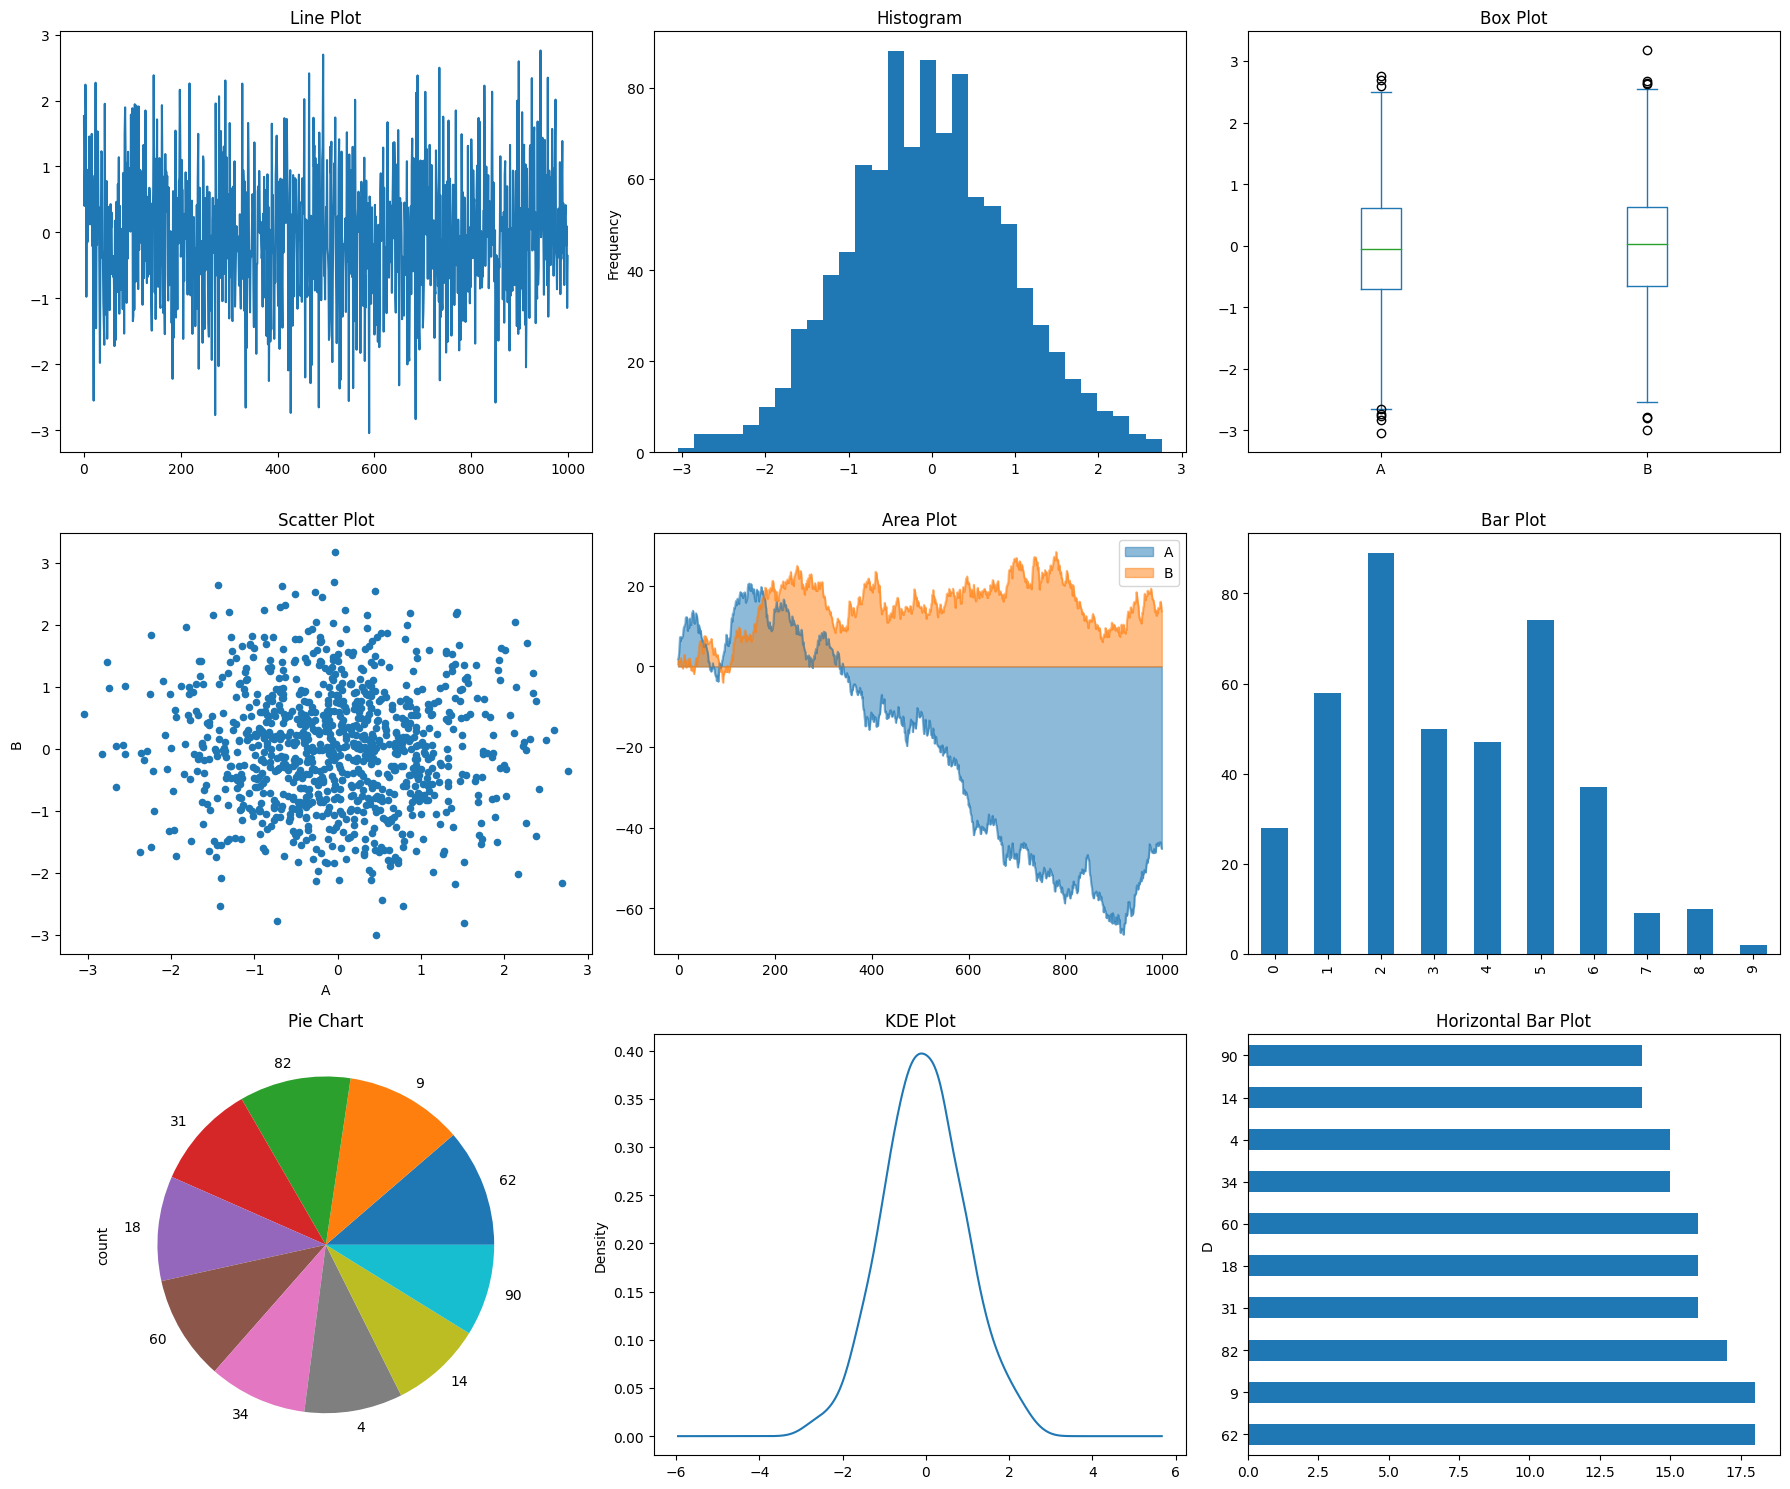

In [1]:
# 데이터 생성

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
df = pd.DataFrame({
    'A': np.random.randn(1000),
    'B': np.random.randn(1000),
    'C': np.random.randn(1000) * 100,
    'D': np.random.randint(1,100,1000)
})

# 데이터프레임을 3행 3열 형태로 플롯

fig,axes = plt.subplots(3,3, figsize = (18,15))

# 라인 플롯

df['A'].plot(ax = axes[0,0], title = 'Line Plot')

# 히스토그램

df['A'].plot(kind = 'hist', bins = 30, ax = axes[0,1], title = 'Histogram')

# 박스플롯
df[['A','B']].plot(kind = 'box', ax = axes[0,2], title = 'Box Plot')

# 산점도

df.plot(kind = 'scatter', x = 'A', y = 'B', ax = axes[1,0], title = 'Scatter Plot')

# 면적 그래프 (stacked = False 는 두 시리즈가 겹치지 않도록 하는 옵션)

df[['A','B']].cumsum().plot(kind = 'area', ax = axes[1,1], title = 'Area Plot', stacked = False)

# 막대 그래프

df['D'].head(10).plot(kind = 'bar', ax = axes[1,2], title = 'Bar Plot')

# 파이차트

df['D'].value_counts().head(10).plot(kind = 'pie', ax = axes[2,0], title = 'Pie Chart')

# 커널 밀도 추정 그래프

df['A'].plot(kind = 'kde', ax = axes[2,1], title = 'KDE Plot')

# 수평 막대 그래프

df['D'].value_counts().head(10).plot(kind = 'barh', ax = axes[2,2], title = 'Horizontal Bar Plot')

# 레이아웃 조정

plt.tight_layout()
plt.show()

        Num
0  0.919559
1  0.611747
2  0.377187
3 -1.440259
4  1.157924 

                Num
count  10000.000000
mean      -0.015214
std        1.006697
min       -3.870659
25%       -0.689684
50%       -0.021493
75%        0.660376
max        3.806471 

Axes(0.125,0.11;0.775x0.77)


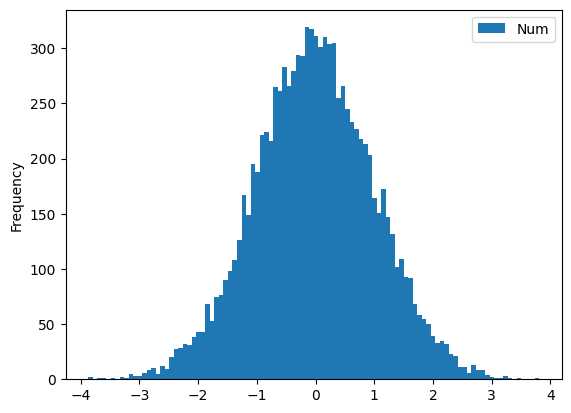

In [2]:
# 평균이 0, 표준편차 1인 표준정규분포 난수 10000개로 데이터프레임 생성

# 통계요약표 및 시각화를 수행(컬럼명 'Num')

data = np.random.randn(10000)
df = pd.DataFrame(data, columns = ['Num'])
print(df.head(),'\n')
print(df.describe(),'\n')
print(df.plot(kind = 'hist', bins = 100))

        Num
0  0.919559
1  0.611747
2  0.377187
3 -1.440259
4  1.157924
                Num
count  10000.000000
mean      -0.015214
std        1.006697
min       -3.870659
25%       -0.689684
50%       -0.021493
75%        0.660376
max        3.806471


<Axes: ylabel='Frequency'>

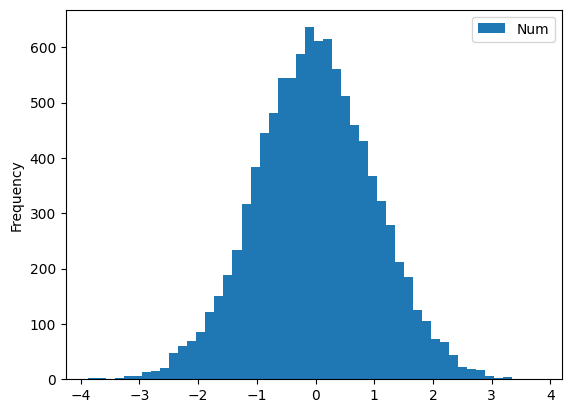

In [3]:
# 평균이 10 표준편차가 2인 정규분포에서 샘플 10000개 추출

from scipy import stats


np.random.seed(1)
sample1 = stats.norm.rvs(loc = 10, scale = 2, size = 10000)
df1 = pd.DataFrame(sample1, columns = ['Num'])

print(df.head())
print(df.describe())
df.plot(kind = 'hist', bins = 50)

In [4]:
df = pd.DataFrame(np.random.rand(6,4),
                  index = ['one','two','three','four','five','six'],
                  columns = ['A','B','C','D'])

print(df)

              A         B         C         D
one    0.865081  0.032853  0.933223  0.267461
two    0.124448  0.340698  0.765585  0.090553
three  0.310120  0.890913  0.894145  0.270737
four   0.335384  0.077759  0.169704  0.280080
five   0.314396  0.789679  0.982823  0.394681
six    0.787791  0.204297  0.848268  0.705182


<Axes: >

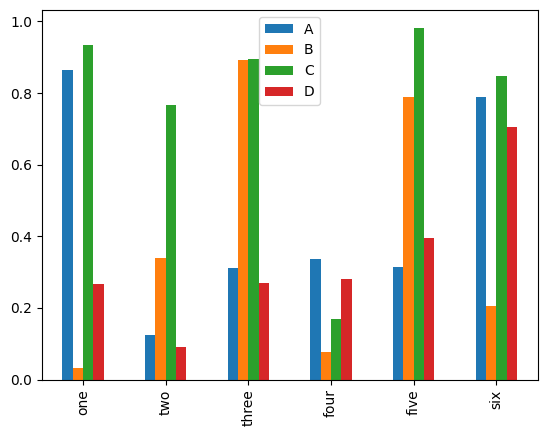

In [5]:
df.plot(kind = 'bar')

<Axes: >

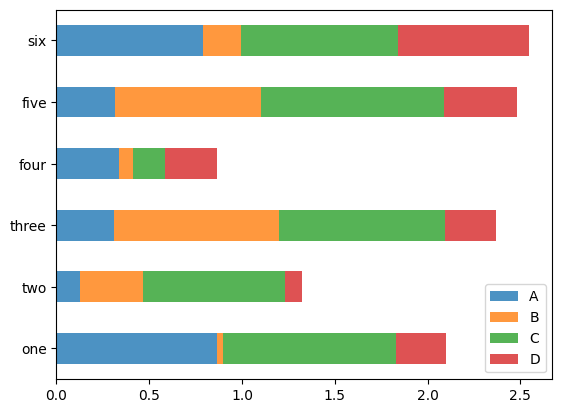

In [6]:
df.plot(kind = 'barh', stacked = True, alpha = 0.8)

<Axes: >

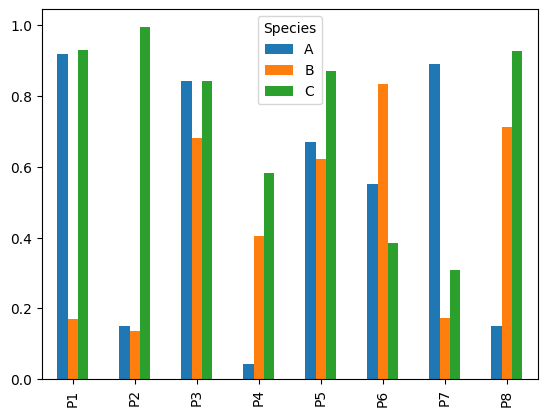

In [7]:
# Q. 아래 df에 대하여 수직막대그래프, 수평막대그래프, 수직 스택막대그래프 , 수평스택막대그래프를 작성

# 샘플 데이터 생성

df = pd.DataFrame(np.random.rand(8,3),
                  index = ['P1','P2','P3','P4','P5','P6','P7','P8'],
                  columns = pd.Index(['A','B','C'], name = 'Species'))

df

df.plot(kind = 'bar')

<Axes: >

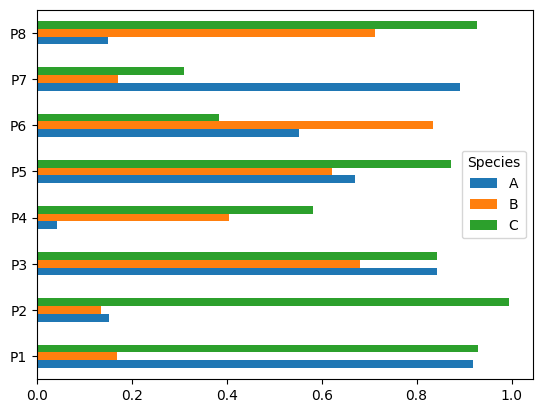

In [8]:
df.plot(kind = 'barh')

<Axes: >

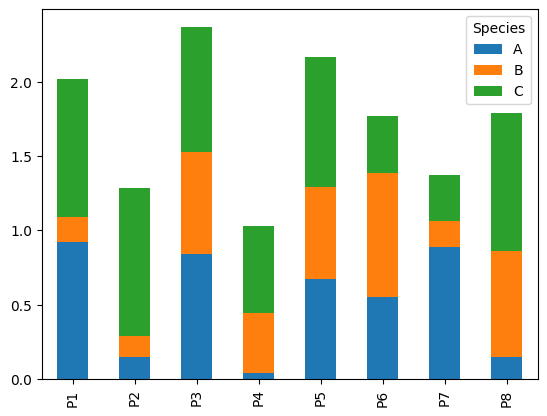

In [9]:
df.plot(kind = 'bar', stacked = True)

<Axes: >

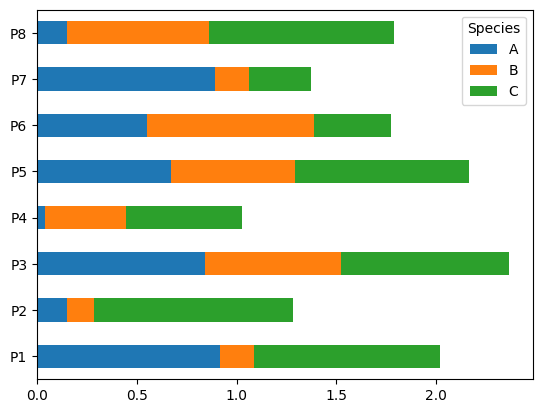

In [10]:
df.plot(kind = 'barh', stacked = True)

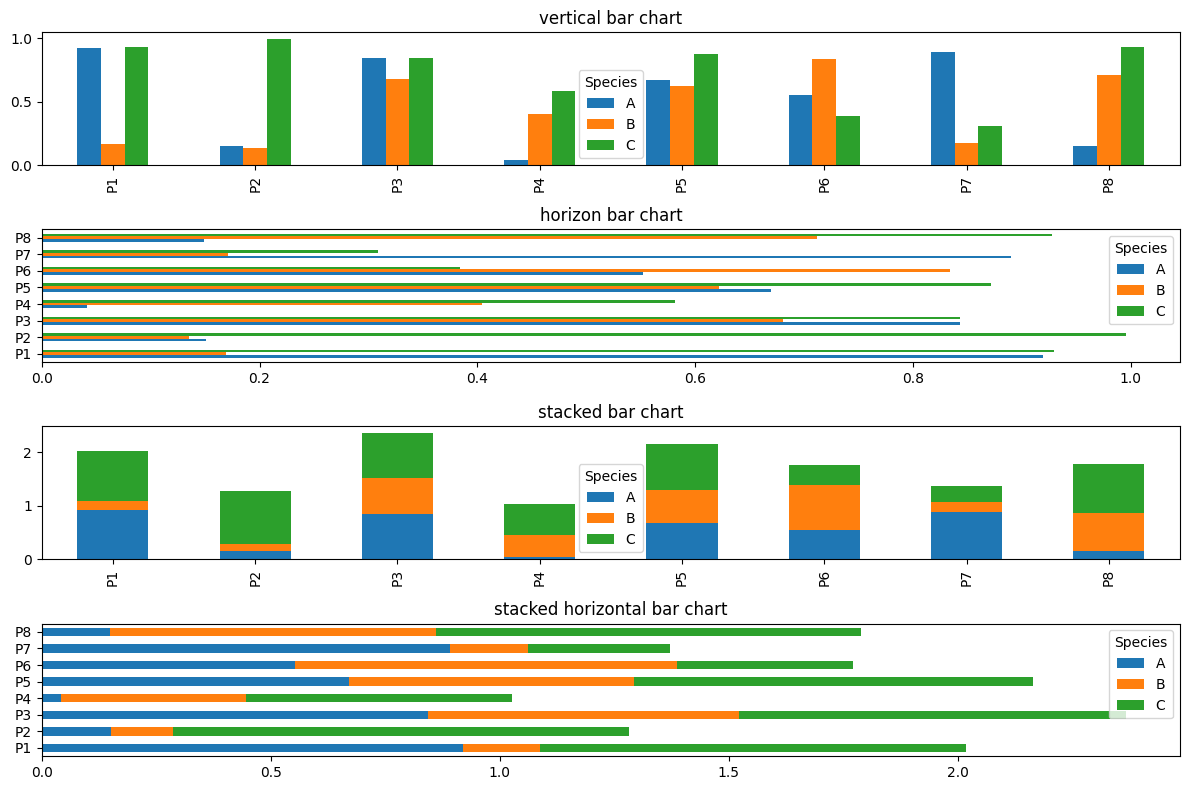

In [11]:
# subplots(nrows = 4, ncols = 1, figsize = (12,18)

fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (12,8))

df.plot(kind = 'bar', ax = axes[0])
axes[0].set_title('vertical bar chart')
df.plot(kind = 'barh', ax = axes[1])
axes[1].set_title('horizon bar chart')
df.plot(kind = 'bar',stacked = True, ax = axes[2])
axes[2].set_title('stacked bar chart')
df.plot(kind = 'barh',stacked = True, ax = axes[3])
axes[3].set_title('stacked horizontal bar chart')

plt.tight_layout()
plt.show()

<Axes: >

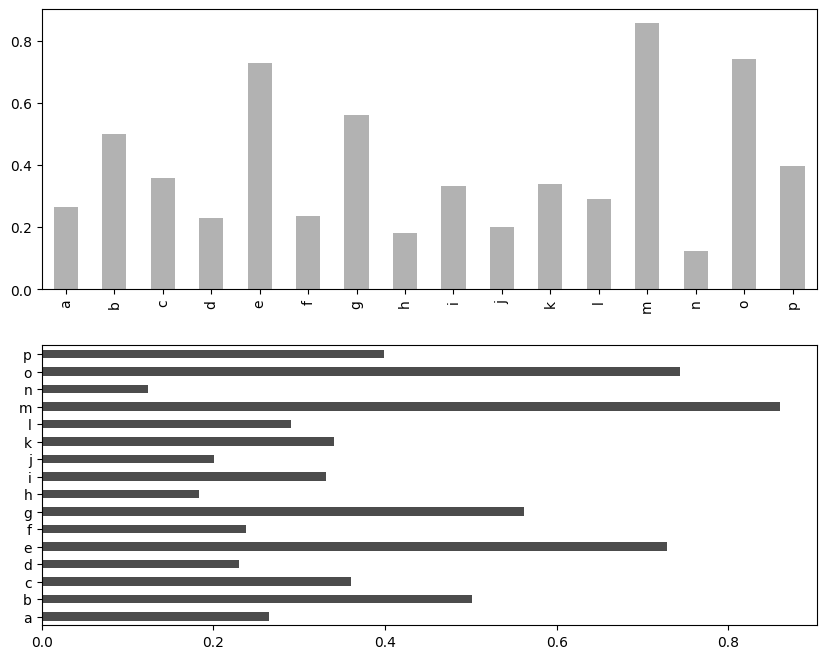

In [12]:
fig, axes = plt.subplots(2,1, figsize = (10,8))
data = pd.Series(np.random.rand(16), index = list('abcdefghijklmnop'))
data.plot.bar(ax = axes[0], color = 'k', alpha = 0.3)
data.plot.barh(ax = axes[1], color = 'k', alpha = 0.7)

## matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y):

## seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)
- sns.heatmap(data,)

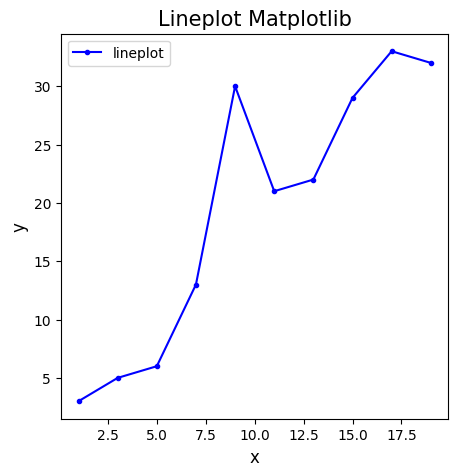

In [13]:
x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])
plt.figure(figsize = (5,5))
plt.plot(x,y, color = 'blue', marker = 'o', markersize = 3)
plt.title('Lineplot Matplotlib', size = 15)
plt.xlabel('x', size = 12)
plt.ylabel('y', size = 12)
plt.legend(labels = ['lineplot'])

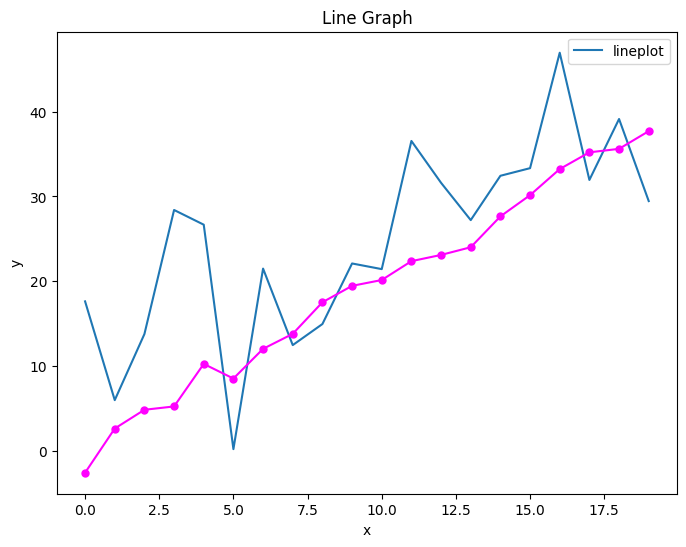

In [14]:
np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20)*2 + np.random.randn(20)*10
# y1 = np.arange(20)*2

y2 = np.arange(20)*2 + np.random.randn(20)
plt.figure(figsize = (8,6))
plt.plot(x,y1)
plt.plot(x,y2, color = 'magenta', marker = 'o', markersize = 5)
plt.xlabel('x', size = 10)
plt.ylabel('y', size = 10)
plt.title('Line Graph')
plt.legend(labels = ['lineplot'])

range(0, 10)
[8 5 7 6 3 4 6 5 6 8]


Text(0.5, 1.0, 'Bar Graph')

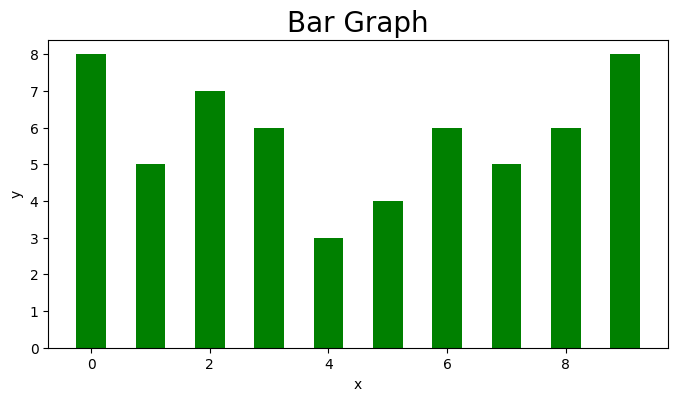

In [15]:
# 막대 그래프

y = np.random.randint(2,10, size = 10)
x = range(len(y))
print(x)
print(y)

plt.figure(figsize = (8,4))
plt.bar(x,y,width = 0.5, color = 'green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bar Graph', size = 20)

In [16]:
from google.colab import files
uploaded = files.upload()

Text(0, 0.5, 'weight')

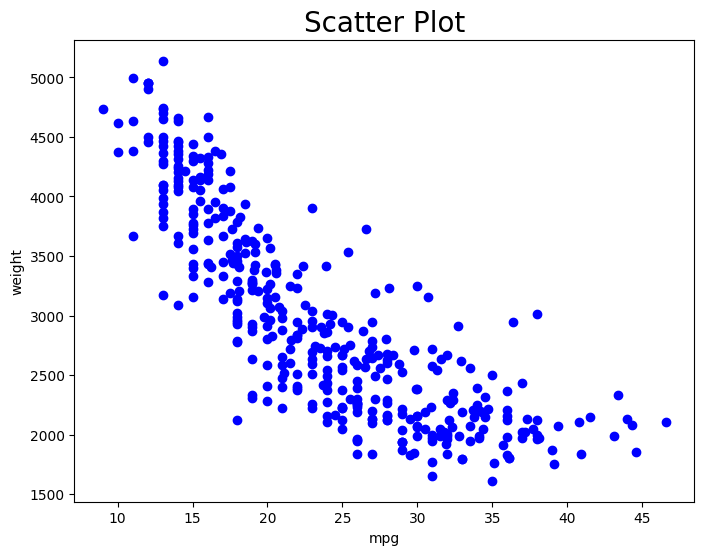

In [17]:
# scatter plot

df_auto = pd.read_excel('auto-mpg (1).xlsx')
x = df_auto.mpg
y = df_auto.weight

plt.figure(figsize = (8,6))
plt.scatter(x,y, color = 'blue')
plt.title('Scatter Plot', size = 20)
plt.xlabel('mpg')
plt.ylabel('weight')


Text(0.5, 0, 'weigh')

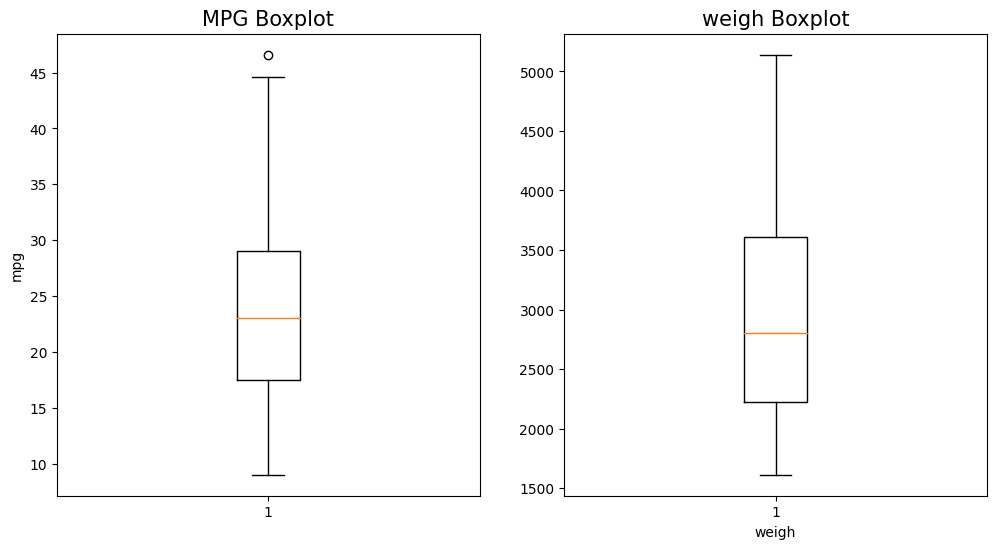

In [18]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.boxplot(df_auto.mpg)
plt.title('MPG Boxplot', size = 15)
plt.ylabel('mpg')

plt.subplot(1,2,2)
plt.boxplot(df_auto.weight)
plt.title('weigh Boxplot', size = 15)
plt.xlabel('weigh')

Text(0, 0.5, 'count')

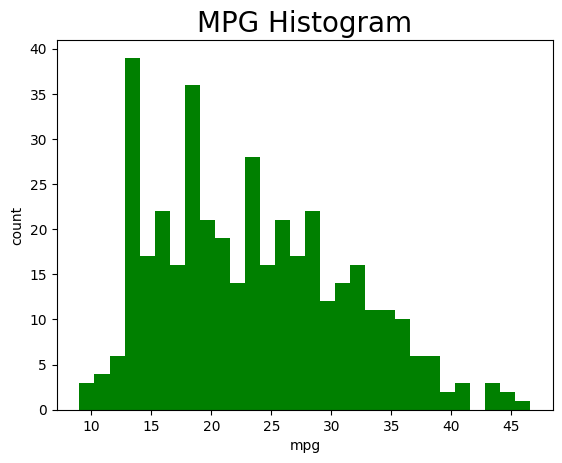

In [19]:
# histogram
plt.hist(df_auto.mpg, bins = 30, color = 'green')
plt.title('MPG Histogram', size = 20)
plt.xlabel('mpg')
plt.ylabel('count')

Text(0.5, 0, 'weigh')

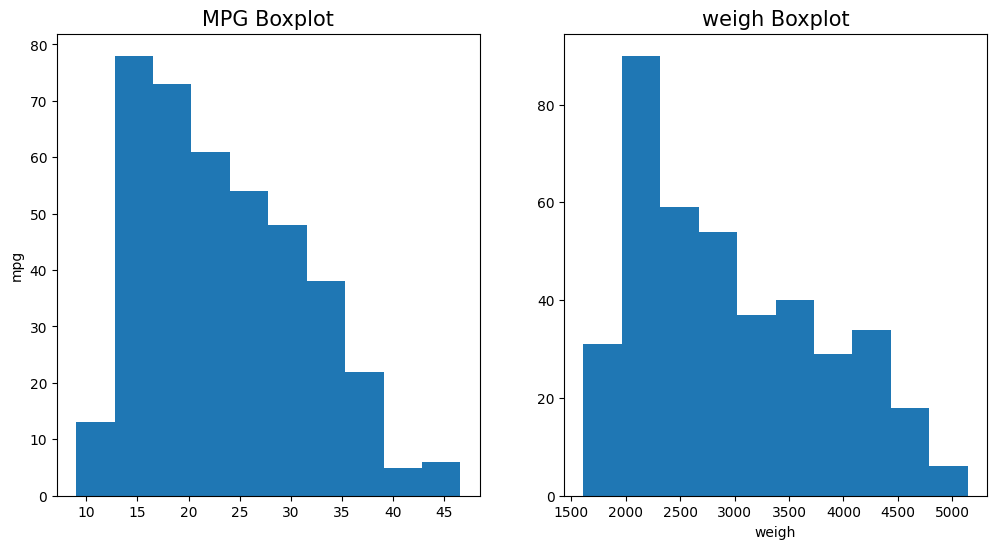

In [20]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.hist(df_auto.mpg)
plt.title('MPG Boxplot', size = 15)
plt.ylabel('mpg')

plt.subplot(1,2,2)
plt.hist(df_auto.weight)
plt.title('weigh Boxplot', size = 15)
plt.xlabel('weigh')

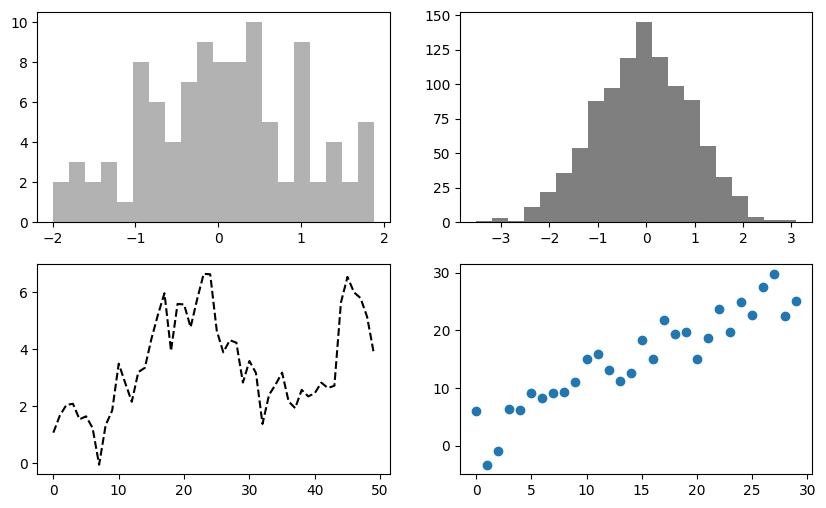

In [21]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])

ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = 0.3)
ax2.hist(np.random.randn(1000), bins = 20, color = 'k', alpha = 0.5)
ax3.plot(np.random.randn(50).cumsum(), 'k--')
# ax3.plot(x,y, 'k--')
ax4.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

In [22]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Text(0, 0.5, 'weight')

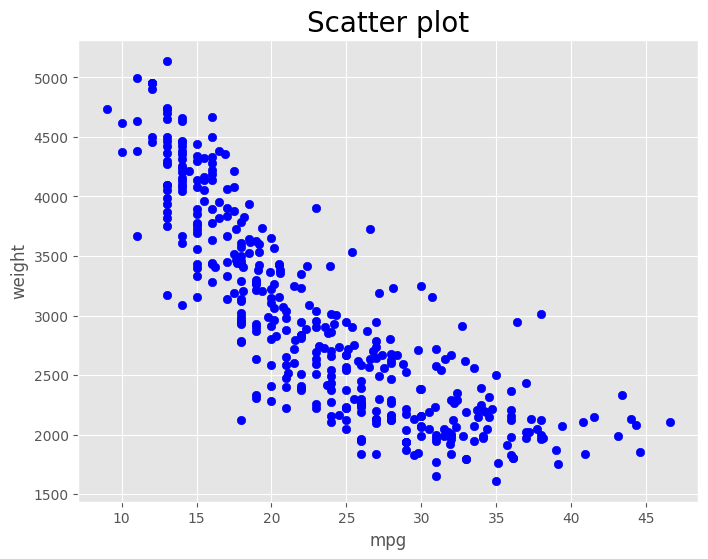

In [23]:
plt.style.use('ggplot')
x = df_auto['mpg']
y = df_auto['weight']

plt.figure(figsize = (8,6))
plt.scatter(x,y, color = 'blue')
plt.grid(True)
plt.title('Scatter plot', size = 20)
plt.xlabel('mpg')
plt.ylabel('weight')

In [24]:
# 설치 후 세션 다시 시작
# google colab에는 한국어 글꼴이 사전 설치되어 있지 않으므로 수동으로 설치
!sudo apt-get install -y fonts_nanum # 'NanumBarunGothic' 글꼴 설치
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package fonts_nanum
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache:

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import numpy as np

np.random.seed(0)
data = np.random.randn(1000)
cdata = data.cumsum()
print(data[:10],'\n')

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ] 



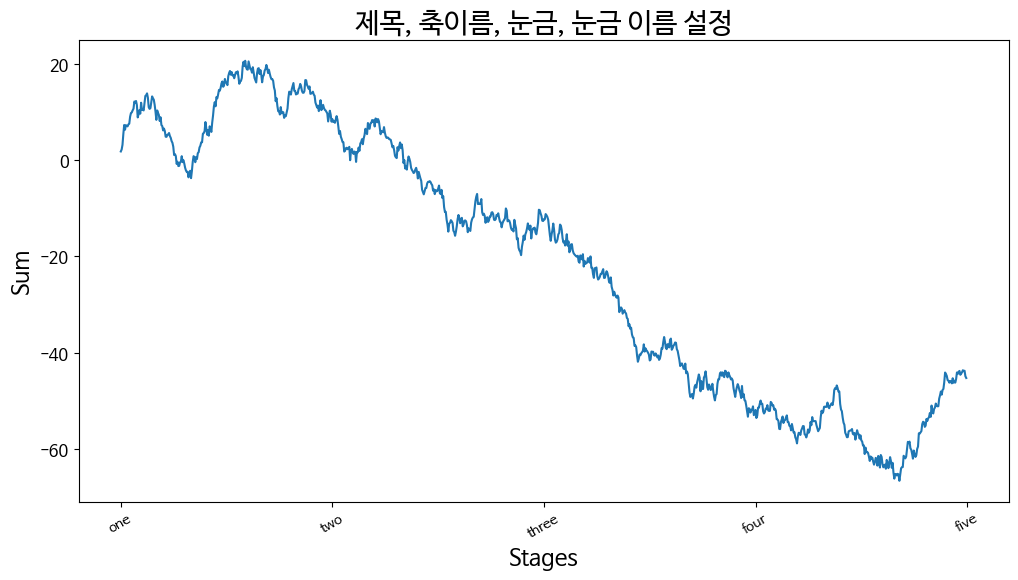

In [3]:
import matplotlib.pyplot as plt

# 한글 폰트 설정

plt.rc('font', size=12, family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize= (12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                            rotation = 30, fontsize = 'small')
ax.set_title('제목, 축이름, 눈금, 눈금 이름 설정', size = 20)
ax.set_xlabel('Stages', size = 16)
ax.set_ylabel('Sum', size = 16)
plt.show()